In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
%gui qt

In [5]:
import numpy as np
from spiketag.base import *
from spiketag.view import *
from hdbscan import HDBSCAN

In [6]:
import phy
from phy.gui import GUI

In [7]:
filename  = 'S:/pcie.bin'
nCh       = 32
fs        = 25000
numbyte   = 4
time_span = 1 # 1 seconds
global time_slice
time_slice = 0
span = time_span * fs
highlight = True

In [8]:
mua = MUA(filename=filename, nCh=nCh, fs=fs, numbytes=numbyte)
spk = mua.tospk(ch_span=2)
fet = spk.tofet('pca')

In [10]:
fet[26].shape

(2566L, 6L)

In [11]:
spk.tofet?

In [12]:
spk = spk[26]

In [14]:
spk.shape

(2566L, 20L, 5L)

In [59]:
X = np.concatenate((spk[:,4:14,:].transpose(2,1,0)),axis=0).T

In [60]:
X.shape

(2566L, 50L)

In [61]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


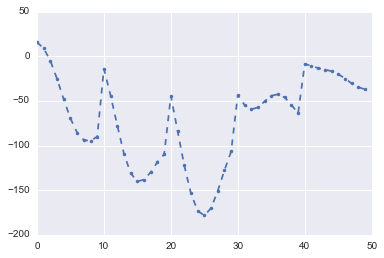

In [74]:
plt.plot(X[2000,:],'.--');

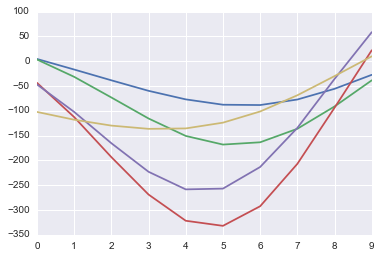

In [76]:
plot(spk[15,4:14,:].squeeze())

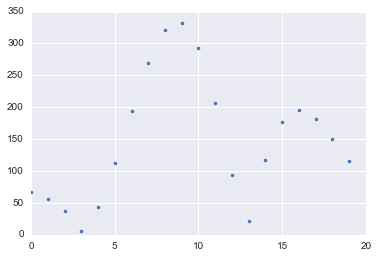

In [81]:
weight_vector = abs(spk[15,:,2].squeeze())
plot(weight_vector,'.')

In [86]:
weight_vector = weight_vector/numpy.linalg.norm(weight_vector)

In [95]:
weight_vector

array([ 0.0849471 ,  0.06968062,  0.04670614,  0.00711128,  0.05453867,
        0.14115332,  0.24235712,  0.33697289,  0.40319541,  0.41603884,
        0.36650273,  0.2593981 ,  0.1175777 ,  0.02762537,  0.14709981,
        0.22136538,  0.2443735 ,  0.22796471,  0.18808866,  0.1447459 ], dtype=float32)

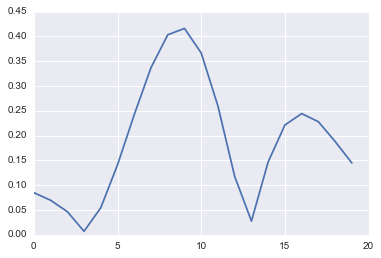

In [90]:
plot(weight_vector)

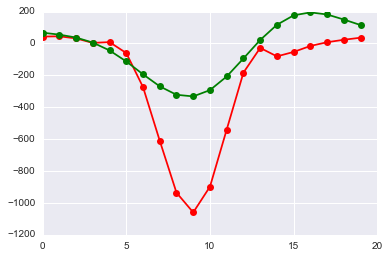

In [106]:
plt.plot(2.5 * weight_vector * spk[40,:,2].squeeze(),'r-o')
plt.plot(spk[15,:,2].squeeze(),'g-o')

In [118]:
spk.shape[-1]

5L

In [126]:
7/2

3

In [142]:
u = arange(5/2+1)+1

In [186]:
def f(x, a=None, p=None):
    n = len(x)
    if a is None:
        a = float(n)/2 - 1
    if p is None:
        p = n/2
    return (a/p) * (p - abs(x % (2*p) - p) ) + 1

In [192]:
weight_channel = f(np.arange(5))

In [193]:
weight_channel

array([ 1.  ,  1.75,  2.5 ,  1.75,  1.  ])

In [195]:
weight_vector

(20L,)

In [201]:
W = weight_channel * weight_vector.reshape(-1,1)

In [202]:
W.shape

(20L, 5L)

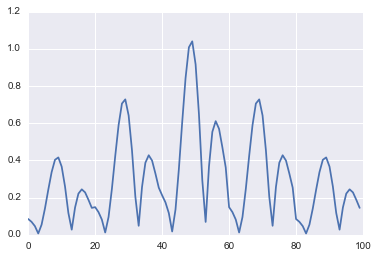

In [209]:
plot(W.T.ravel())

In [218]:
        weight_vector = np.array([ 0.0149471 ,  0.02968062,  0.03670614,  0.04711128,  0.05453867,
                                   0.14115332,  0.24235712,  0.33697289,  0.40319541,  0.41603884,
                                   0.36650273,  0.2593981 ,  0.1175777 ,  0.04762537,  0.18709981,
                                   0.22136538,  0.2443735 ,  0.22796471,  0.18808866,  0.1447459 ],
                                   dtype=np.float32)

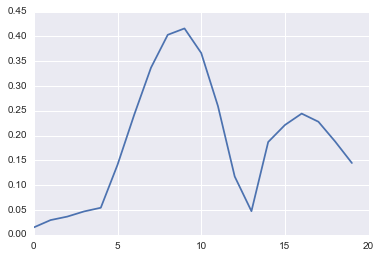

In [219]:
plot(weight_vector)

In [220]:
weight_vector[13]

0.04762537